In [10]:
#Imports
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#read data
df = pd.read_csv("telefonica-talentum-ai-2019/Data/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
#Delete customer ID
df = df.drop(["CustomerID"], axis=1)

In [ ]:
#Check if data is null: it is not, skipping for now
df.isnull()

In [4]:
#EXPLORE DATA

#Get mean values
df.mean()

Age                       38.85
Annual Income (k$)        60.56
Spending Score (1-100)    50.20
dtype: float64

In [5]:
#Get median
df.median()

Age                       36.0
Annual Income (k$)        61.5
Spending Score (1-100)    50.0
dtype: float64

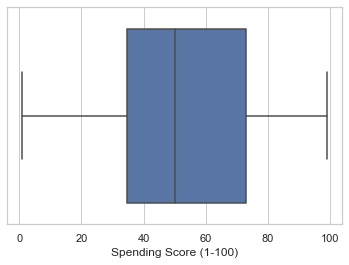

In [23]:
#Get IQR for Spending Score (1-100)
data = df["Spending Score (1-100)"]
sns.set(style="whitegrid")
ax = sns.boxplot(x=data)

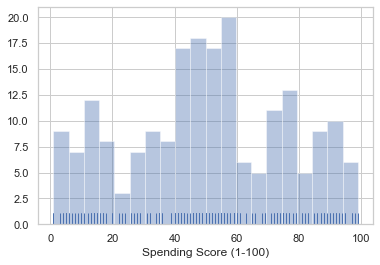

In [24]:
sns.distplot(data, kde=False, bins = 20, rug=True);
plt.show()

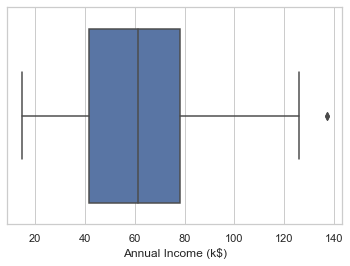

In [7]:
#Get IQR for Annual Income (k$)
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Annual Income (k$)"])

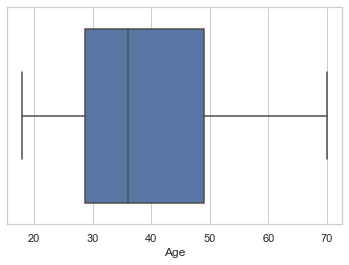

In [9]:
#Get IQR for Age
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Age"])

Text(0.5, 1.0, 'Income vs Spend')

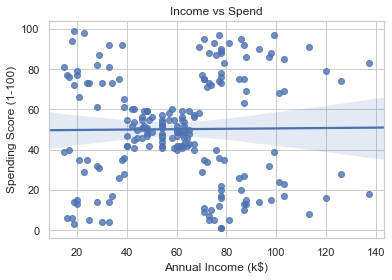

In [25]:
#Regplot Income vs Spend: see if there is linear relationship
sns.regplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"]).set_title("Income vs Spend")


In [26]:
#Correlation
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


Text(0.5, 1.0, 'Age vs Spend')

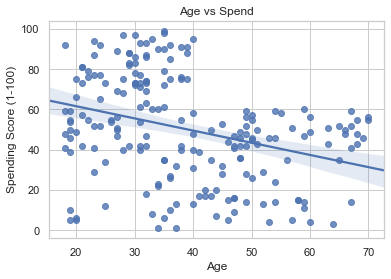

In [27]:
#Regplot Income vs Spend: see if there is linear relationship
sns.regplot(x=df["Age"], y=df["Spending Score (1-100)"]).set_title("Age vs Spend")

In [74]:
df_1 = df[["Age", "Spending Score (1-100)"]]
df_1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
5,22,76
6,35,6
7,23,94
8,64,3
9,30,72


In [37]:
X = df_1.to_numpy()
kmeans = KMeans(n_clusters=2,  init='random', n_init=10).fit(X)
kmeans.cluster_centers_

array([[46.16521739, 32.88695652],
       [28.95294118, 73.62352941]])

In [45]:
y_pred = kmeans.labels_
print(y_pred.shape)
print(X[:,0].shape)

(200,)
(200,)


Text(0, 0.5, 'Spending Score')

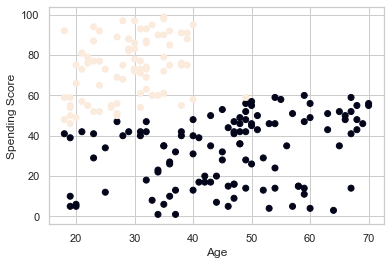

In [47]:
#Represent
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.xlabel("Age")
plt.ylabel("Spending Score")

Text(0, 0.5, 'Spending Score')

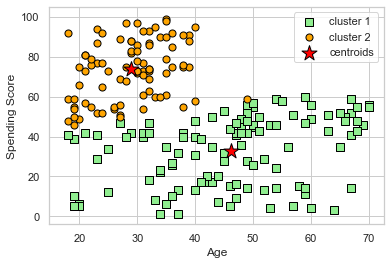

In [51]:
#Represent pro
#Cluster 1
plt.scatter(
    X[y_pred == 0, 0], X[y_pred == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1')

#Cluster 2
plt.scatter(
    X[y_pred == 1, 0], X[y_pred == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2')

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.xlabel("Age")
plt.ylabel("Spending Score")

In [75]:
kmeans.score(df_1)
#Se puede hacer un for para ir probando por número de clusters
#Generalmente mientras más clusteres mejor score
#Se suele usar el método del codo para parar, cuando la derivada en pieza a descender es bueno quedarse ahí 

-75949.15601023019

In [65]:
kmeans.predict([[50, 40]])

array([0])

In [77]:
df_1_grouped = df_1
df_1_grouped['cluster'] = y_pred
df_1_grouped

C:\Users\wflop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Age,Spending Score (1-100),cluster
0,19,39,0
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,0
5,22,76,1
6,35,6,0
7,23,94,1
8,64,3,0
9,30,72,1
